In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [4]:
#import some data to play with
company=pd.read_csv("D:\Data Science-ExcelR\Data Sceince-Tahera\\Company_Data.csv")

In [5]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
#viewing data types
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
#-------------------converting from categorical data---------------------------
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.dtypes
company.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [9]:
#label encoding to convert categorical values into numeric.
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [10]:
#------------------------ setting feature and target variables -------------------------------------------------------------#
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']


In [11]:
#x = company.drop(['Sales', 'High'], axis = 1)
x = company[feature_cols]
y = company.High
print(x)
print(y)


     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [12]:
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.


In [13]:
#------------------------ splitting into train and test data -------------------------------------------------------------#
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)
#-------------------------building decision tree model-----------------------------# 
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

dcmodel = dcmodel.fit(x_train,y_train) #train decision tree
y_predict = dcmodel.predict(x_test)


In [14]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)


In [15]:
#-----------Finding the accuracy------------------------------------#
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )
#visualizing the decision tree----------------------------------------------#
#dot_data = StringIO()
#export_graphviz(dcmodel,out_file=dot_data,feature_names=feature_cols)

#(graph, )= graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())


Accuracy :  75.0


In [17]:
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


[[36  7]
 [13 24]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        43
           1       0.77      0.65      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.75      0.75      0.75        80



In [ ]:
#Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.metrics import classification_report, confusion_matrix


In [33]:
#reading the dataset
fraud=pd.read_csv("D:\Data Science-ExcelR\Data Sceince-Tahera\\Fraud_check.csv")
fraud


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [21]:
#viewing the types
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [31]:
for i in range(len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i] <= 30000:
        fraud['Taxable.Income'][i] = 'risky'
    else:
        fraud['Taxable.Income'][i] = 'good'


<ipython-input-31-d7a7360ee28f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Taxable.Income'][i] = 'good'
C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-31-d7a7360ee28f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Taxable.Income'][i] = 'risky'


In [32]:
fraud.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [34]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [35]:
fraud = pd.get_dummies(fraud)
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [45]:
# Renaming columns
data = fraud.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()


,taxable_income,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [42]:
data.describe()

,taxable_income,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


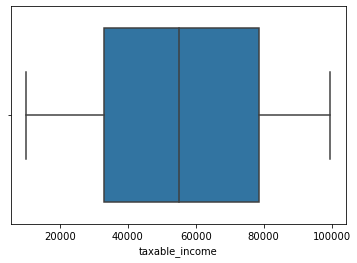

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


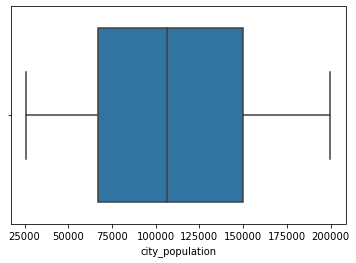

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


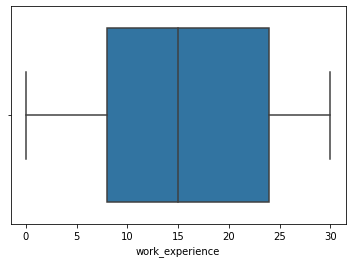

In [49]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()


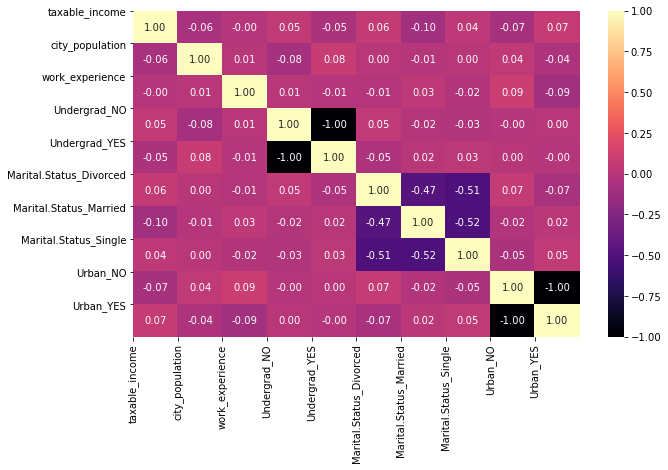

In [52]:
#Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


In [53]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['taxable_category'] = pd.cut(x = data['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data


,taxable_income,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable_category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_category', ylabel='count'>

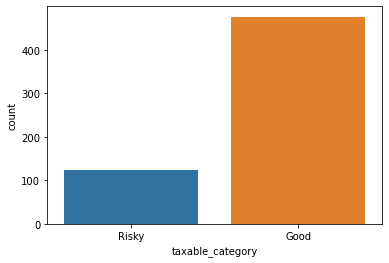

In [54]:
sns.countplot(data['taxable_category'])

In [55]:
data['taxable_category'].value_counts()


Good     476
Risky    124
Name: taxable_category, dtype: int64

In [57]:
# dropping column taxable_income
data1 = data.drop('taxable_income', axis = 1)
data1


,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable_category
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


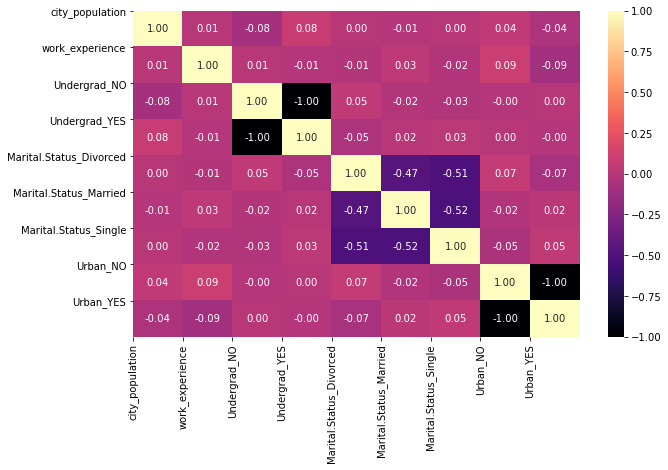

In [58]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


In [59]:
# Dividing data into independent variables and dependent variable
X = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']


In [60]:
X


,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [61]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [62]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)


In [63]:
x_train

,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
509,65531,27,1,0,0,1,0,0,1
149,49505,25,1,0,0,0,1,1,0
124,139324,13,0,1,1,0,0,1,0
428,128266,24,0,1,0,1,0,0,1
465,116282,21,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
71,105680,22,1,0,0,0,1,1,0
106,58535,20,0,1,0,0,1,0,1
270,130680,5,1,0,0,1,0,1,0
435,111774,4,1,0,1,0,0,0,1


In [64]:
x_test

,city_population,work_experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
110,32450,19,1,0,0,0,1,0,1
419,138074,20,1,0,0,1,0,1,0
565,31064,28,1,0,1,0,0,1,0
77,118344,26,0,1,0,1,0,1,0
181,36116,20,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
231,153147,2,0,1,0,0,1,1,0
403,130912,27,1,0,1,0,0,0,1
278,114823,11,1,0,0,1,0,1,0
472,151963,11,1,0,0,1,0,0,1


In [65]:
y_train

509    Risky
149     Good
124     Good
428    Risky
465    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: taxable_category, Length: 402, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [66]:
y_test

110    Risky
419     Good
565     Good
77      Good
181    Risky
       ...  
231     Good
403     Good
278    Risky
472     Good
350     Good
Name: taxable_category, Length: 198, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [ ]:
#Building model based on C5.0 Algorithm¶

In [67]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

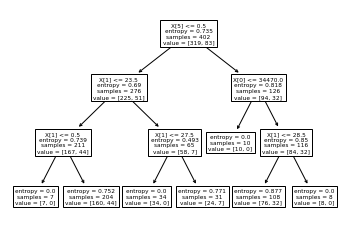

In [68]:
# Plotting Decision tree
tree.plot_tree(model_c5);


In [69]:
data1.columns


Index(['city_population', 'work_experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'taxable_category'],
      dtype='object')

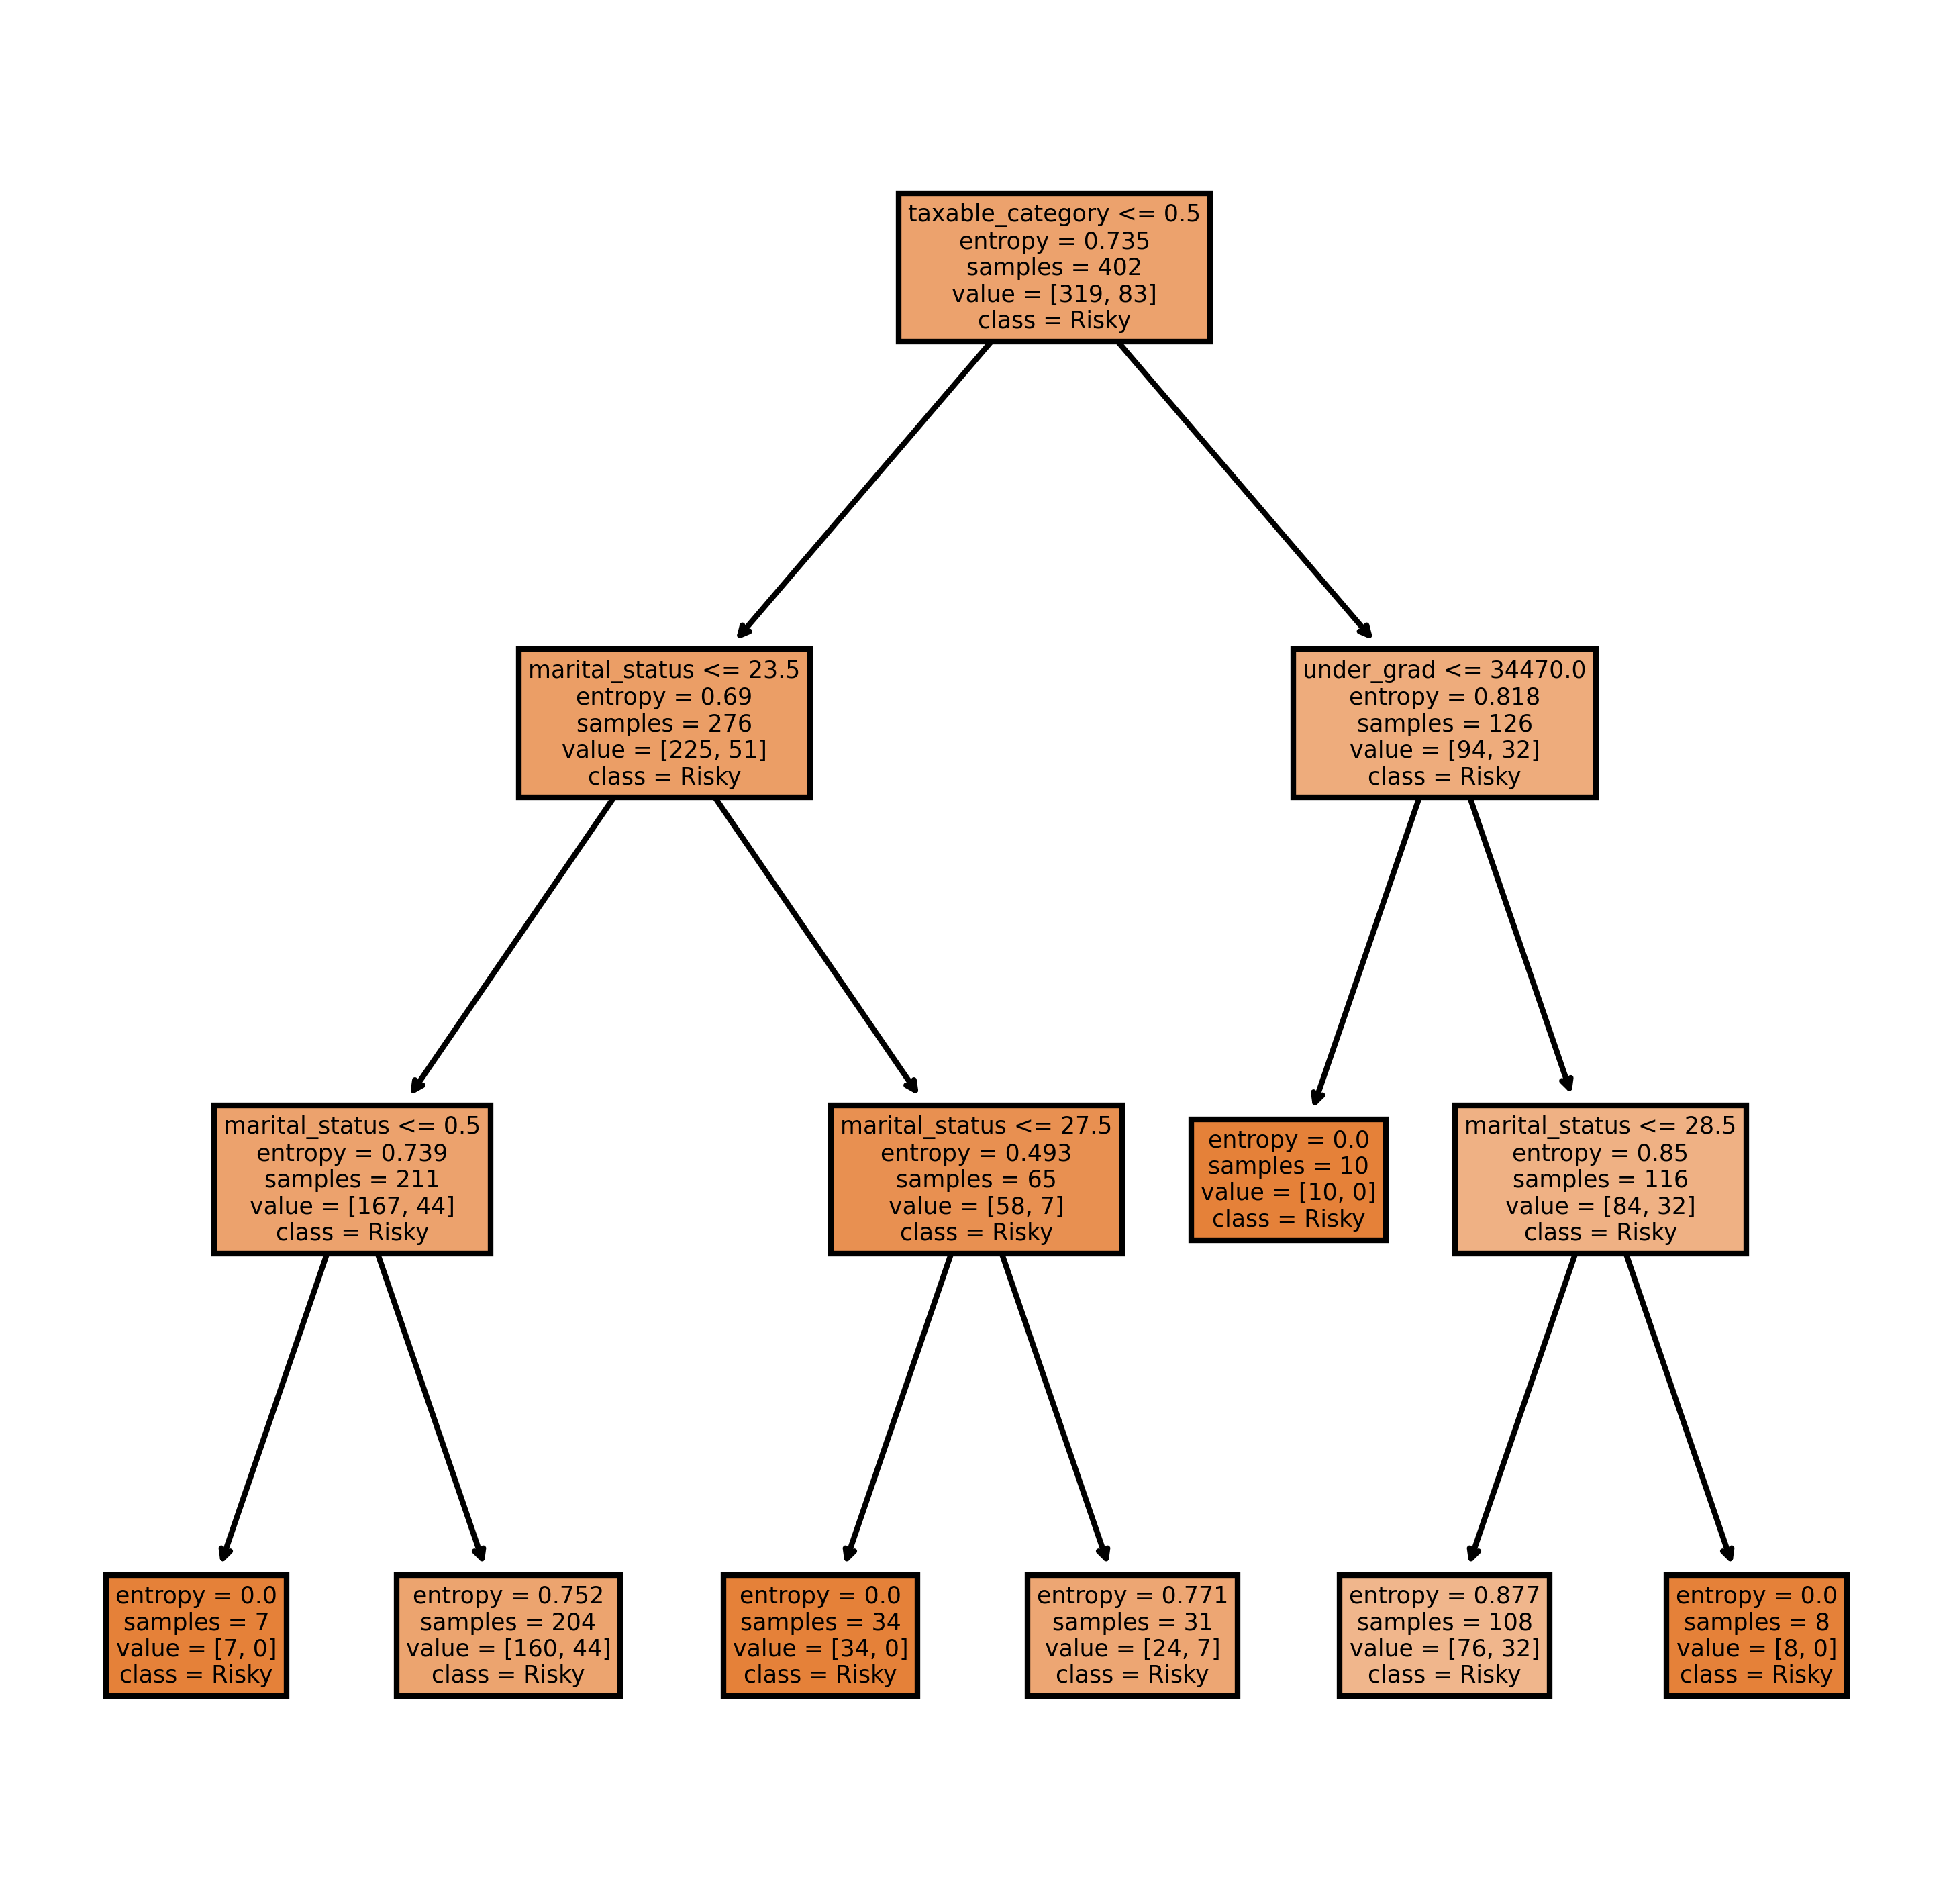

In [70]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [71]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()


Good    198
dtype: int64

In [72]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [73]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)


col_0,Good
taxable_category,
Risky,41
Good,157


In [74]:
# Checking accuracy of model
model_c5.score(x_test, y_test)


0.7929292929292929

In [ ]:
#Building model based on CART Algorithm¶


In [75]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

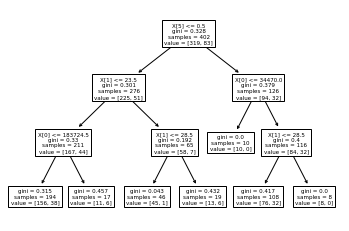

In [76]:
# Plotting Decision tree
tree.plot_tree(model_CART);


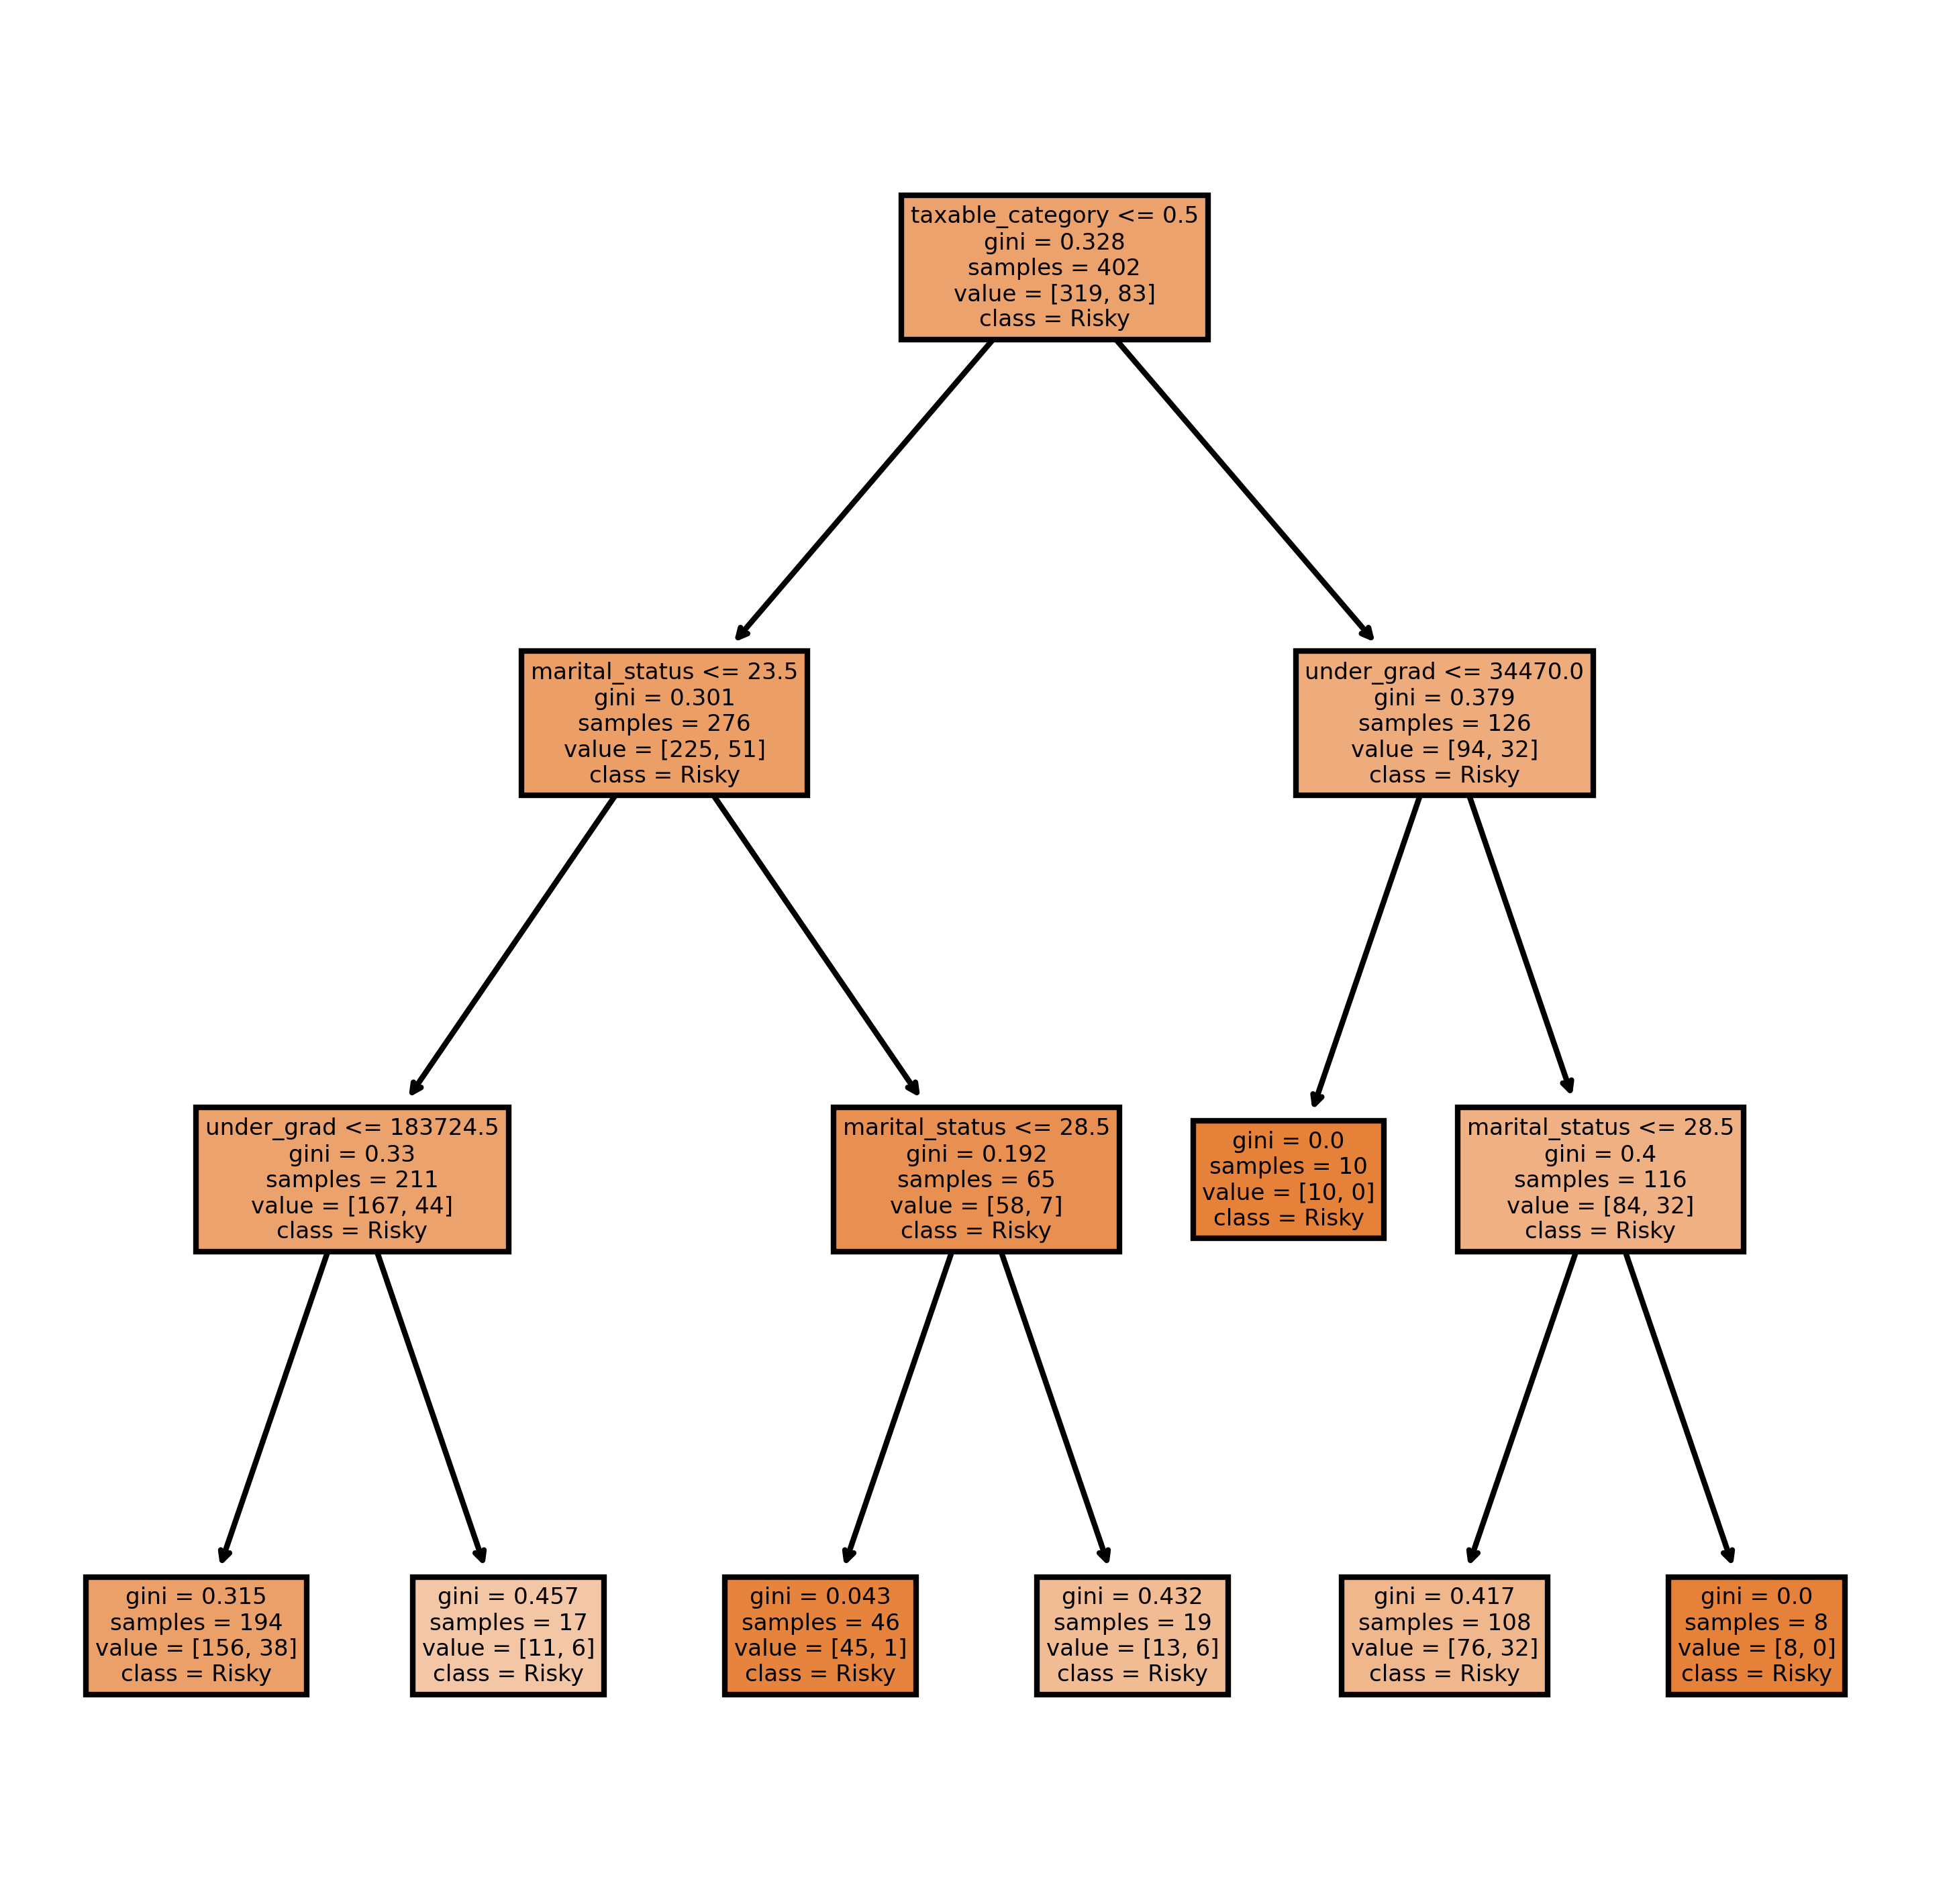

In [77]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [78]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()


Good    198
dtype: int64

In [79]:
preds


array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [80]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)



col_0,Good
taxable_category,
Risky,41
Good,157


In [81]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7929292929292929